In [18]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 5)
mpl.rcParams['axes.grid'] = False

import tensorflow as tf
tf.random.set_seed(13)
pd.options.display.max_rows = 8


import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import optimizers
import numpy as np
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, Callback

np.random.seed(4)
#from tensorflow import set_random_seed
tf.random.set_seed(4)
#from util import csv_to_dataset, history_points


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
##SADA
csv_path="MSFT_daily.csv"
data = pd.read_csv(csv_path)
data.columns="date open high low close volume".split()
col='open'
data[f'{col}_diff1'] = data[col] - data[col].shift(1)
data.dropna(inplace=True)

n1 = int(len(data) * .9)
X  = data[data.columns[1:-1]]
y  = data[data.columns[-1:]]
print(f"Training COunt {n1}")
Xtrn = X[:n1]  # Training set
ytrn = y[:n1]  # Training y

standardScaler = 0
if (standardScaler):
    scalerX = preprocessing.StandardScaler()
    scalerY = preprocessing.StandardScaler()
else:
    scalerX = preprocessing.MinMaxScaler()
    scalerY = preprocessing.MinMaxScaler()

scalerX  = scalerX.fit(Xtrn)
scalerY  = scalerY.fit(ytrn)

X  = scalerX.transform(X)
y  = scalerY.transform(y)


Xtrn = X[:n1]  # Training set
ytrn = y[:n1]  # Training y
Xtst = X[n1:]  # Test predictors
ytst = y[n1:]  # trainig y
data



Trainimg COunt 4528


,date,open,high,low,close,volume,open_diff1
1,2000-02-29,91.75,91.75,88.8700,89.37,29218700.0,1.50
2,2000-03-01,89.62,94.09,88.9400,90.81,53444900.0,-2.13
3,2000-03-02,91.81,95.37,91.1200,93.37,53466300.0,2.19
4,2000-03-03,94.75,98.87,93.8700,96.12,50717600.0,2.94
...,...,...,...,...,...,...,...
5029,2020-02-25,174.20,174.84,167.6462,168.07,68073295.0,6.43
5030,2020-02-26,169.71,173.26,168.2100,170.17,56387148.0,-4.49
5031,2020-02-27,163.32,167.03,157.9800,158.18,93174906.0,-6.39
5032,2020-02-28,152.41,163.71,152.0000,162.01,96388312.0,-10.91


In [51]:
n1, Xtrn.shape, Xtrn, ytrn.shape, ytrn, Xtst.shape

(4528,
 (4528, 5),
 array([[0.78577294, 0.76604951, 0.78149752, 0.76736973, 0.03993138],
        [0.76390885, 0.78959549, 0.78223677, 0.78225806, 0.08132944],
        [0.78638883, 0.80247535, 0.80525927, 0.80872622, 0.081366  ],
        ...,
        [0.79603777, 0.78939424, 0.81835463, 0.81586022, 0.03405521],
        [0.81297475, 0.80328034, 0.8383145 , 0.82992142, 0.04085683],
        [0.82672962, 0.80720467, 0.83778646, 0.81730769, 0.03364646]]),
 (4528, 1),
 array([[0.76749364],
        [0.65203562],
        [0.7894402 ],
        ...,
        [0.74204835],
        [0.77226463],
        [0.76240458]]),
 (504, 5))

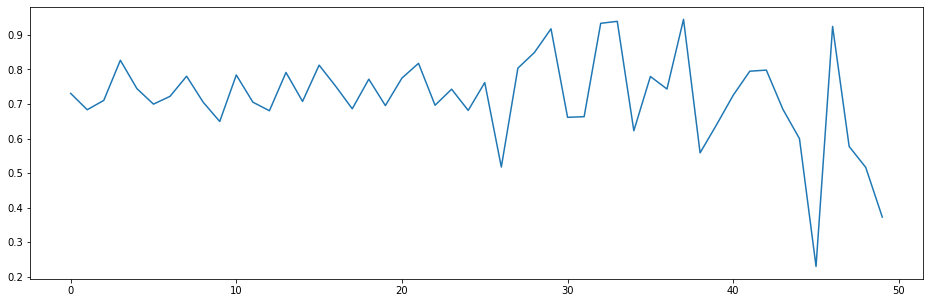

In [21]:
#plt.plot(Xtrn[-50:,0])
plt.plot(ytst[-50:,0])

In [54]:
history_points=50
tsParams1 = {'length': history_points, 'batch_size': 1, 'stride': 1, 'sampling_rate': 1, "shuffle":0 }
tsParams2 = {'length': history_points, 'batch_size': 1, 'stride': 1, 'sampling_rate': 1, "shuffle":0 }

trng1 = TimeseriesGenerator(Xtrn, ytrn, **tsParams1 )
valg1 = TimeseriesGenerator(Xtst, ytst, **tsParams1 )
valg2 = TimeseriesGenerator(X, y, **tsParams2 )
history_points, tsParams1, len(trng1), len(valg1), len(valg2), trng1[0]

(50,
 {'length': 50,
  'batch_size': 1,
  'stride': 1,
  'sampling_rate': 1,
  'shuffle': 0},
 4478,
 454,
 4982,
 (array([[[0.78577294, 0.76604951, 0.78149752, 0.76736973, 0.03993138],
          [0.76390885, 0.78959549, 0.78223677, 0.78225806, 0.08132944],
          [0.78638883, 0.80247535, 0.80525927, 0.80872622, 0.081366  ],
          [0.81656744, 0.8376937 , 0.8343014 , 0.83715881, 0.07666899],
          [0.82939848, 0.82260012, 0.79469849, 0.78029363, 0.06998257],
          [0.83063026, 0.82390823, 0.8139191 , 0.80355666, 0.1053991 ],
          [0.8069185 , 0.8107265 , 0.80399197, 0.8313689 , 0.07056408],
          [0.82231575, 0.8490642 , 0.84623508, 0.87727461, 0.06535972],
          [0.86594129, 0.87422017, 0.89375858, 0.88761373, 0.06312989],
          [0.84602751, 0.85157979, 0.87263703, 0.85659636, 0.04283158],
          [0.85629234, 0.84151741, 0.84750238, 0.82681969, 0.05279174],
          [0.81461712, 0.81505333, 0.83240046, 0.82940447, 0.03546335],
          [0.82878259,

In [57]:
def getmodel(nfeatures, nOut, history_points):
    lstm_input = Input(shape=(history_points, nfeatures), name='lstm_input')
    x = LSTM(50, name='lstm_0')(lstm_input)
    x = Dropout(0.2, name='lstm_dropout_0')(x)
    x = Dense(64, name='dense_0')(x)
    x = Activation('sigmoid', name='sigmoid_0')(x)
    x = Dense(nOut, name='dense_1')(x)
    output = Activation('linear', name='linear_output')(x)

    model = Model(inputs=lstm_input, outputs=output)
    adam = optimizers.Adam(lr=0.0005)
    model.compile(optimizer=adam, loss='mse')
    
    return model

model_1 = getmodel(Xtrn.shape[-1], ytrn.shape[-1], tsParams1['length'])
model_1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 50, 5)             0         
_________________________________________________________________
lstm_0 (LSTM)                (None, 50)                11200     
_________________________________________________________________
lstm_dropout_0 (Dropout)     (None, 50)                0         
_________________________________________________________________
dense_0 (Dense)              (None, 64)                3264      
_________________________________________________________________
sigmoid_0 (Activation)       (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
linear_output (Activation)   (None, 1)                 0   

In [58]:
validation_steps, vv, ep=50, 1, 10
if ("cp" not in globals()):
    print("Creating the ModelCheckpoint")
    cp = ModelCheckpoint(filepath="simple2-11.h5", monitor='val_loss', save_best_only=True, verbose=1)
    
    dd='/opt/LMCO/git/notebooks/no-git/NNBook/notebooks/NNetworks/LSTM/new'
    #model_1 = load_model(f'{dd}/simple2-11.h5')
    #cp.best = 1.4190391084412113e-09; #This was the best we saw
    
cp = ModelCheckpoint(filepath="simple2-11.h5", monitor='val_loss', save_best_only=True, verbose=1)
model_1.fit(trng1, verbose=vv, epochs=ep, validation_data=valg1,steps_per_epoch=200, shuffle=True, 
            validation_steps=validation_steps, callbacks=[cp])
cp.best

Epoch 1/10
200/200 [==============================] - 3s 14ms/step - loss: 0.0323 - val_loss: 0.0155

Epoch 00001: val_loss improved from inf to 0.01548, saving model to simple2-11.h5
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0010 - val_loss: 4.1783e-04

Epoch 00002: val_loss improved from 0.01548 to 0.00042, saving model to simple2-11.h5
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0010 - val_loss: 8.9237e-04

Epoch 00003: val_loss did not improve from 0.0004178
Epoch 4/10
200/200 [==============================] - 2s 12ms/step - loss: 9.5312e-04 - val_loss: 0.0015

Epoch 00004: val_loss did not improve from 0.0004178
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 8.1450e-04 - val_loss: 4.3554e-04

Epoch 00005: val_loss did not improve from 0.0004178
Epoch 6/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0013 - val_loss: 0.0180

Epoch 00006: val_loss did not improve fro

0.0001371028774883598

In [61]:
validation_steps, vv, ep=50, 1, 100
model_1.fit(trng1, verbose=vv, epochs=ep, validation_data=valg1,steps_per_epoch=200, shuffle=True, 
            validation_steps=validation_steps, callbacks=[cp])


Epoch 1/100
200/200 [==============================] - 2s 12ms/step - loss: 0.0010 - val_loss: 0.0131

Epoch 00001: val_loss did not improve from 0.0001371
Epoch 2/100
200/200 [==============================] - 2s 12ms/step - loss: 9.4797e-04 - val_loss: 0.0029

Epoch 00002: val_loss did not improve from 0.0001371
Epoch 3/100
200/200 [==============================] - 2s 12ms/step - loss: 7.5539e-04 - val_loss: 0.0023

Epoch 00003: val_loss did not improve from 0.0001371
Epoch 4/100
200/200 [==============================] - 3s 13ms/step - loss: 8.4808e-04 - val_loss: 1.2748e-06

Epoch 00004: val_loss improved from 0.00014 to 0.00000, saving model to simple2-11.h5
Epoch 5/100
200/200 [==============================] - 2s 12ms/step - loss: 5.6323e-04 - val_loss: 5.5455e-04

Epoch 00005: val_loss did not improve from 0.0000013
Epoch 6/100
200/200 [==============================] - 2s 12ms/step - loss: 0.0013 - val_loss: 0.0274

Epoch 00006: val_loss did not improve from 0.0000013
Epoch 7

200/200 [==============================] - 2s 12ms/step - loss: 9.3980e-04 - val_loss: 1.6817e-05

Epoch 00065: val_loss did not improve from 0.0000013
Epoch 66/100
200/200 [==============================] - 2s 12ms/step - loss: 7.9042e-04 - val_loss: 0.0016

Epoch 00066: val_loss did not improve from 0.0000013
Epoch 67/100
200/200 [==============================] - 2s 12ms/step - loss: 8.9998e-04 - val_loss: 4.2181e-04

Epoch 00067: val_loss did not improve from 0.0000013
Epoch 68/100
200/200 [==============================] - 3s 13ms/step - loss: 7.8675e-04 - val_loss: 4.8808e-07

Epoch 00068: val_loss improved from 0.00000 to 0.00000, saving model to simple2-11.h5
Epoch 69/100
200/200 [==============================] - 2s 12ms/step - loss: 7.1615e-04 - val_loss: 0.0077

Epoch 00069: val_loss did not improve from 0.0000005
Epoch 70/100
200/200 [==============================] - 2s 12ms/step - loss: 4.6305e-04 - val_loss: 4.1566e-05

Epoch 00070: val_loss did not improve from 0.000000

200/200 [==============================] - 2s 12ms/step - loss: 0.0010 - val_loss: 5.5410e-04

Epoch 00097: val_loss did not improve from 0.0000005
Epoch 98/100
200/200 [==============================] - 2s 12ms/step - loss: 6.0329e-04 - val_loss: 7.2516e-06

Epoch 00098: val_loss did not improve from 0.0000005
Epoch 99/100
200/200 [==============================] - 2s 12ms/step - loss: 0.0011 - val_loss: 1.4817e-04

Epoch 00099: val_loss did not improve from 0.0000005
Epoch 100/100
200/200 [==============================] - 3s 13ms/step - loss: 5.6885e-04 - val_loss: 1.1229e-05

Epoch 00100: val_loss did not improve from 0.0000005


In [1]:
def plot(modelFile, valg, n=-150, howmany=50):
    m1 = load_model(modelFile)
    
    xxt = np.array([valg[i][0][0] for i in range(len(valg))])
    yyt = np.array([valg[i][1][0] for i in range(len(valg))])

    plt.gcf().set_size_inches(22, 10, forward=True)
    yh=m1.predict(xxt)
    plt.plot(yyt[n:n+howmany], marker='o', label="original")
    plt.plot( yh[n:n+howmany], marker='x', label="predicted")
    plt.title(f"{modelFile} <==")
    plt.legend()
    plt.show()
    
    return yyt, yh


In [2]:
dd='/opt/LMCO/git/notebooks/no-git/NNBook/notebooks/NNetworks/LSTM/new'
yo, yh = plot(f'{dd}/simple2-11.h5', valg2,-400,50);

NameError: name 'valg2' is not defined

In [49]:
len(valg2), valg2[-2][1]

(454, array([[0.74127226]]))

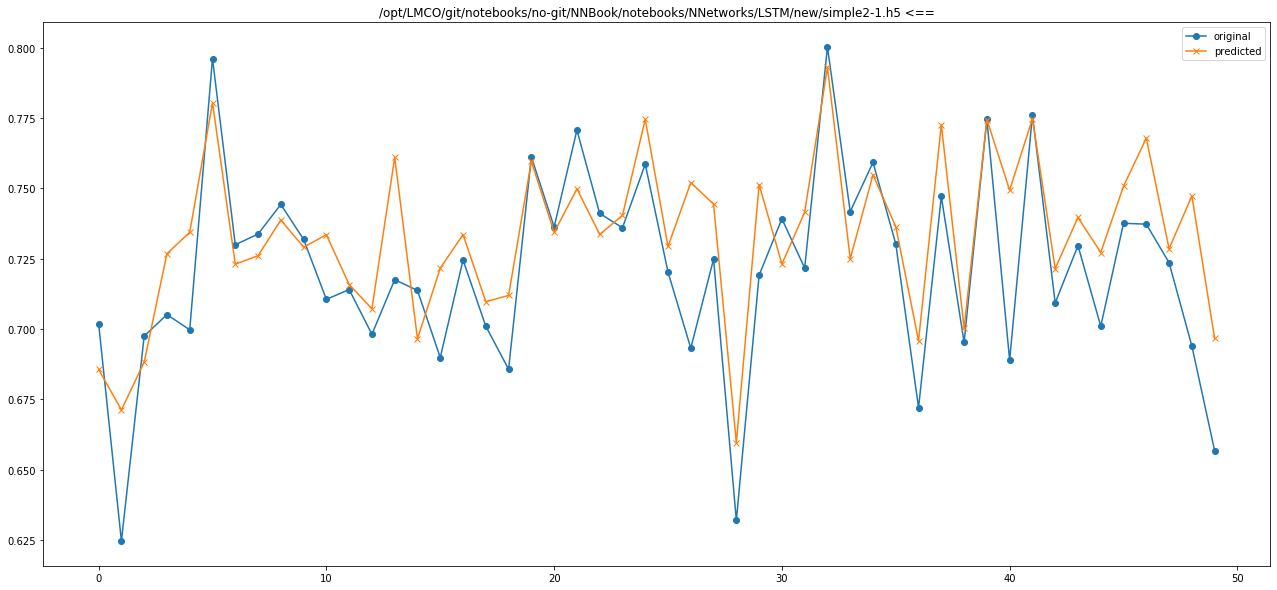

In [37]:
dd='/opt/LMCO/git/notebooks/no-git/NNBook/notebooks/NNetworks/LSTM/new'
yo, yh = plot(f'{dd}/simple2-1.h5', valg2,-400,50);


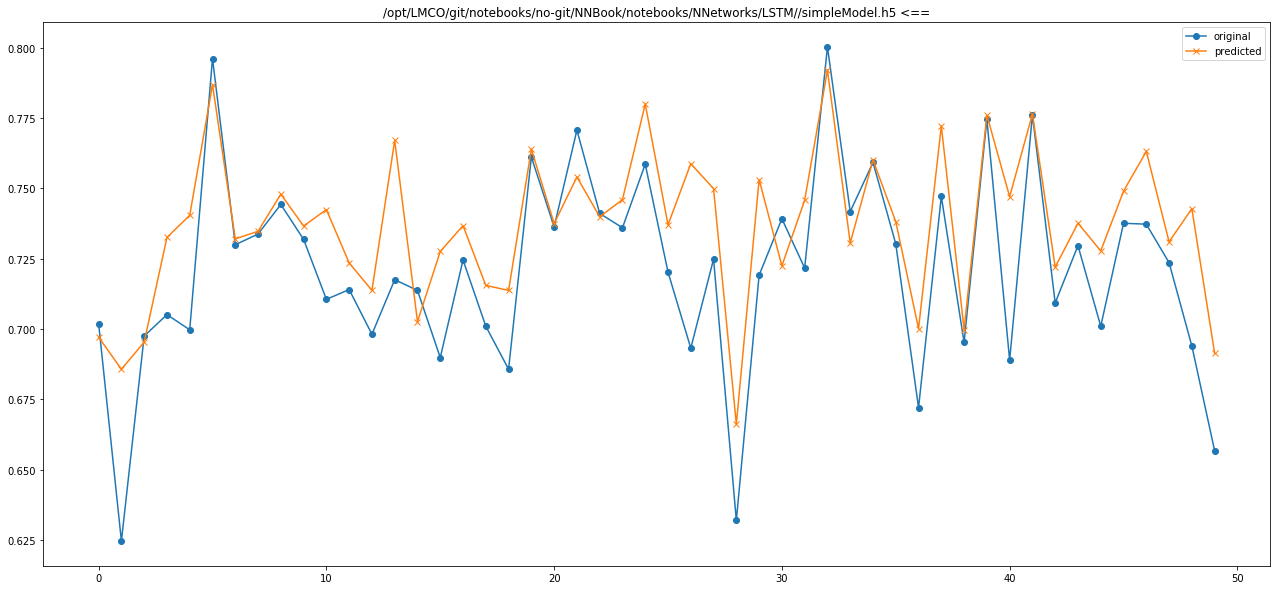

In [50]:
dd='/opt/LMCO/git/notebooks/no-git/NNBook/notebooks/NNetworks/LSTM/'
yo, yh = plot(f'{dd}/simpleModel.h5', valg2,-400,50);


In [155]:
# yoo = scalerY.inverse_transform(yo)
yho = scalerY.inverse_transform(yh)
yo1 = data[data.columns[-1]][-500:].values # <= original 

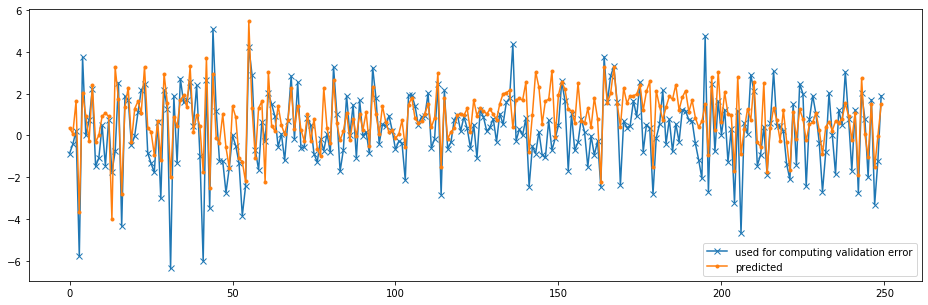

In [156]:
fr,hm=-350, 250
#plt.plot(yo1[fr:fr+hm]    , marker='o', label="original")
plt.plot(yoo[fr:fr+hm]+0.1, marker='x', label = "used for computing validation error")
plt.plot(yho[fr:fr+hm]    , marker='.', label = "predicted")
plt.legend()

''

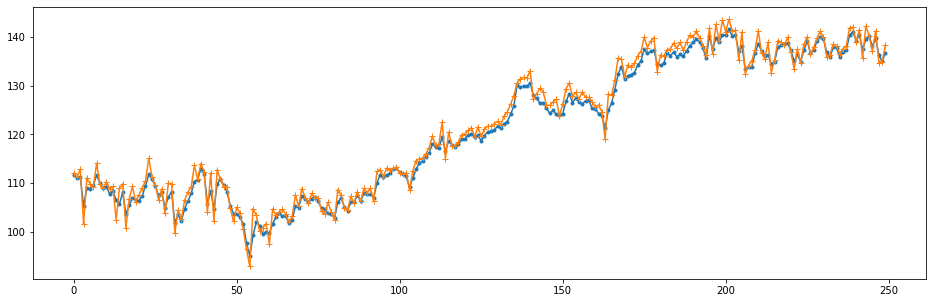

In [157]:
oopen = data['open'].values[-len(yho)-1:]# <= original 
popen = oopen[1:] + yho.flatten()

plt.plot(oopen[fr:fr+hm], marker='.', label="original")
plt.plot(popen[fr:fr+hm], marker='+', label = "used for computing validation error")
;